# SIMPLE KNN - Titanic

Description: In order to reinforce my studies in classification models, mainly using KNN, I chose the Titanic dataset available on Kaggle with the aim of training the model and predicting the survival percentage.

Titanic Dataset: https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [81]:
# Import libs
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay , classification_report
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [63]:
# Load data
df = pd.read_csv('titanic_train.csv')

In [64]:
# Show and understand data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
# Separate columns that will be used
df = df[['Survived', 'Age', 'Fare']]

In [66]:
# Analyze whether there are null values ​​that may influence the results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [67]:
# The age column has missing values, so instead of deleting the rows we can fill them with the average age
df.Age.fillna(df.Age.mean(), inplace=True)

C:\Users\Ayko Nascimento\AppData\Local\Temp\ipykernel_10048\3139354971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.mean(), inplace=True)


In [68]:
# Separate X and y values
X = df.drop('Survived', axis=1)
y = df.Survived

In [69]:
# Separate datas in train and test using 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=246)

In [70]:
# Instantiate model choosing only 3 neighbors to start
knn = KNN(n_neighbors=3)

# Train model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
# Predicting survivors from test data
predict = knn.predict(X_test)

# Show values
print(predict)

[1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0
 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1
 0]


In [72]:
# Counting survivors and non-survivors. 0 = No, 1 = Yes
pd.value_counts(predict)

C:\Users\Ayko Nascimento\AppData\Local\Temp\ipykernel_10048\892119934.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(predict)


0    145
1     78
Name: count, dtype: int64

C:\Users\Ayko Nascimento\AppData\Local\Temp\ipykernel_10048\3853967107.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ax.bar(np.unique(predict), pd.value_counts(predict), color=['black', 'green'], width=1)


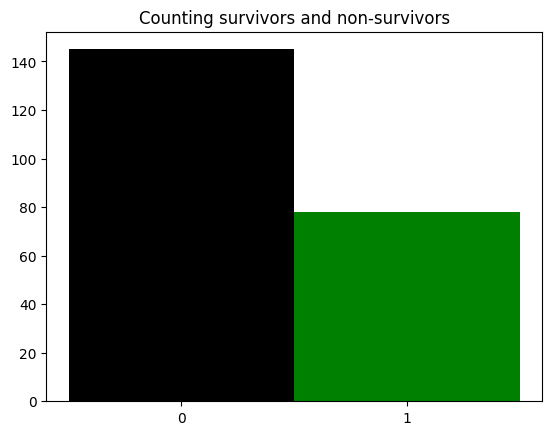

In [73]:
# Plot values
fig, ax = plt.subplots()
plt.title('Counting survivors and non-survivors')
ax.bar(np.unique(predict), pd.value_counts(predict), color=['black', 'green'], width=1)
ax.set(xticks=(0,1))
plt.show()

In [74]:
# Analyze accuracy_score
accuracy_score(y_test, predict)

0.6053811659192825

In [78]:
# Analyze confusion_matrix
confusion_matrix(y_test, predict)

array([[101,  44],
       [ 44,  34]])

In [77]:
# Analyze classification_report
classification_report(y_test, predict)

'              precision    recall  f1-score   support\n\n           0       0.70      0.70      0.70       145\n           1       0.44      0.44      0.44        78\n\n    accuracy                           0.61       223\n   macro avg       0.57      0.57      0.57       223\nweighted avg       0.61      0.61      0.61       223\n'

In [57]:
# Apply model tuning to know whether adding more neighbors or fewer neighbors can improve the model
X_train_modeltuning, X_test_modeltuning, y_train_modeltuning, y_test_modeltuning = train_test_split(X_train, y_train, train_size=0.90, test_size=0.10, random_state=246)

<Axes: title={'center': 'What is the best number of neighbors to set?'}>

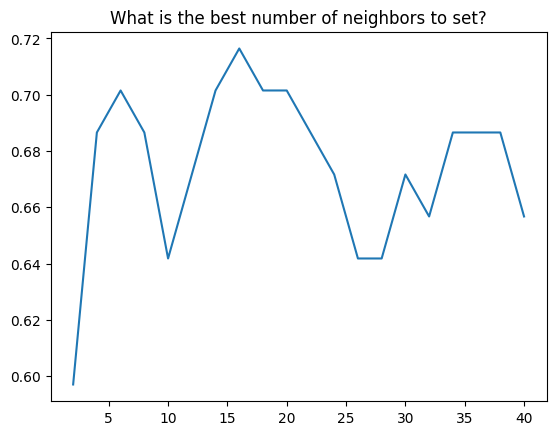

In [83]:
scores = []
k_s = []

# Increase the number of neighbors
for k in range(2, 41, 2):
    knn = KNN(n_neighbors=k)
    knn.fit(X_train_modeltuning, y_train_modeltuning)
    result = knn.predict(X_test_modeltuning)
    score = knn.score(X_test_modeltuning, y_test_modeltuning)
    scores.append(score)
    k_s.append(k)

# Plot values
plt.title('What is the best number of neighbors to set?')
sns.lineplot(x=k_s, y=scores)

In [79]:
# Apply number of neighbors obtained from results
knn = KNN(n_neighbors=16)
knn.fit(X_train, y_train)
result = knn.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, result))
print('Matrix Confusion ', confusion_matrix(y_test, result))
print('Classification Report: ', classification_report(y_test, predict))


Accuracy:  0.6995515695067265
Matrix Confusion  [[129  16]
 [ 51  27]]
Classification Report:                precision    recall  f1-score   support

           0       0.70      0.70      0.70       145
           1       0.44      0.44      0.44        78

    accuracy                           0.61       223
   macro avg       0.57      0.57      0.57       223
weighted avg       0.61      0.61      0.61       223



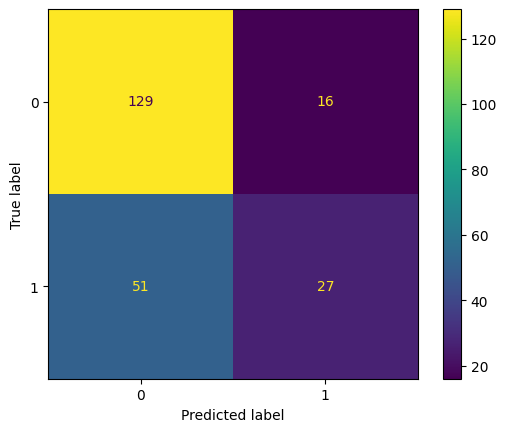

In [82]:
# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, result)).plot()